### Import Package

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

### Import Dataset

In [3]:
df = pd.read_csv('dataset_mortality_min.csv')
df.head()

,kode,provinsi,tahun,kurang_40,41-50,51-60,61-70,lebih_70,meninggal
0,1,ACEH,2016,7.792762,21.779223,36.757103,23.751399,9.919514,0.383775
1,3,RIAU,2016,7.314291,27.669283,40.121373,20.012776,4.882278,0.002236
2,4,KEPULAUAN RIAU,2016,7.722008,31.329288,32.855304,19.856591,8.236808,0.002390
3,7,JAMBI,2016,7.301235,22.822300,37.789040,23.661704,8.425721,0.004435
4,8,LAMPUNG,2016,7.956715,23.594314,37.534479,23.647358,7.267133,0.001167


### Data Preparation

In [4]:
X = df.drop(['kode','tahun','provinsi','meninggal'],axis=1)
y = df['meninggal']
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.1, random_state=42)

### Model Random Forest

In [5]:
rfr = RandomForestRegressor(n_estimators=1000,random_state=42)
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

### Check Output

In [6]:
y_pred = rfr.predict(X_test)

### Scatter Plot

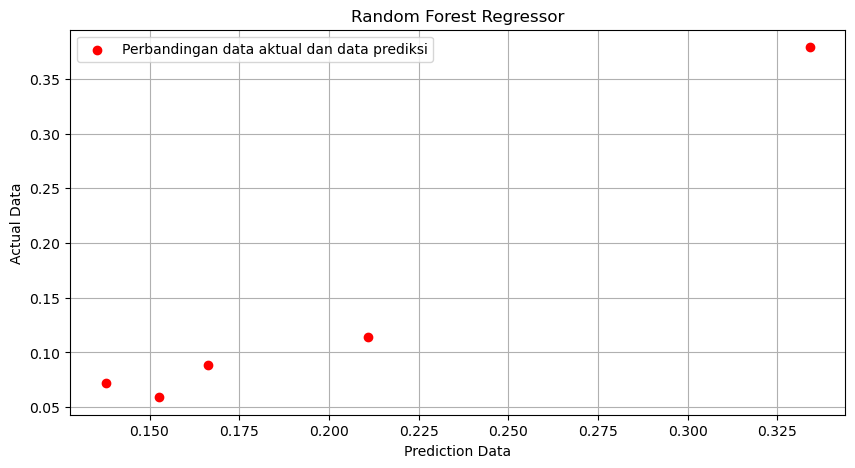

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred,color='red',label='Perbandingan data aktual dan data prediksi')
plt.legend()
plt.grid()
plt.title('Random Forest Regressor')
plt.xlabel('Prediction Data')
plt.ylabel('Actual Data')
plt.show()

### Evaluation Metric

##### MAE

In [8]:
mean_absolute_error(y_pred,y_test)

0.0757527764700005

##### MSE

In [9]:
mean_squared_error(y_pred,y_test)

0.006101563927765401

##### R Square

In [10]:
r2_score(y_pred,y_test)

0.5737301490728874

In [11]:
# print(X_test)

In [12]:
y_pred2 = rfr.predict(X_test.tail(1))

In [13]:
print(X_test.tail(1))

    kurang_40  41-50      51-60      61-70   lebih_70
34  15.144766    0.0  23.830735  19.153675  18.596882


### Testing New Data

In [14]:
new_data={"kurang_40":[20],
      "41-50":[3],
     "51-60":[4],
     "61-70":[23],
     "lebih_70":[34]
     }

In [15]:
df2 = pd.DataFrame(new_data)

In [16]:
print(df2)

   kurang_40  41-50  51-60  61-70  lebih_70
0         20      3      4     23        34


In [17]:
y_pred3 = rfr.predict(df2)

In [18]:
print(y_pred3)

[0.36972046]
